In [ ]:
using Revise
using FinalProject
using Plots

## Load the data

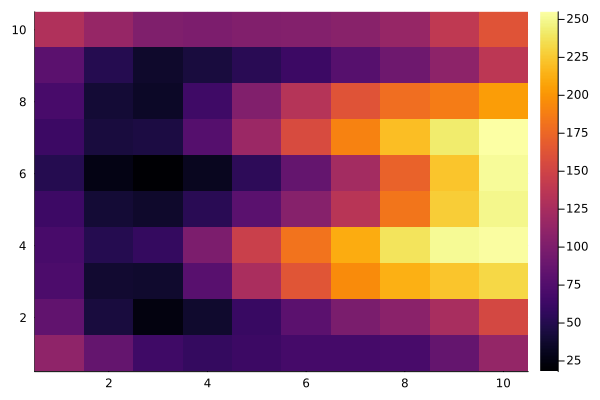

In [142]:
labels, images = get_data("../data/data_alphabet.npz")
r = images[:,:,labels .== 0x04]
p = Plots.heatmap(reverse(r[:,:,4], dims=1))
display(p)

## Choose two letters & create train and test sets

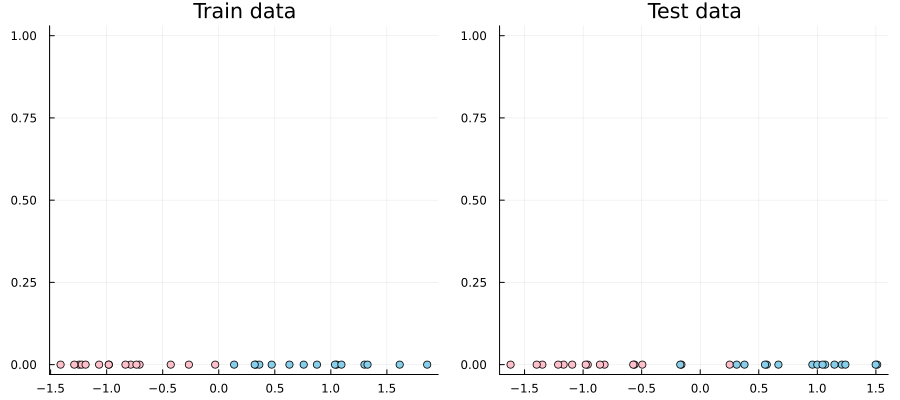

In [143]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V',
'Y', 'Z']
# KZ, CZ;
# JL, EB, CV, EN, LZ- test set also separable (error 0)
imgs, lbls, letter_counts, indices = create_work_set(alphabet, images, labels, letters = "CZ");
imgs_trn, lbls_trn, imgs_tst, lbls_tst = crossval(imgs, lbls, letter_counts);

# Prepare the data - compute features, add padding, etc.
x_trn, X_trn_1, X_trn_2, lbls_trn = prep_data(imgs_trn, lbls_trn)
x_tst, X_tst_1, X_tst_2, lbls_tst = prep_data(imgs_tst, lbls_tst)

# Show data separability
test_train_plot(x_trn, x_tst)

## Logistic regression

Find the weights w with gradient descent and classify

In [144]:
w_init = [-4.0,-1.0]
res = logistic_loss(X_trn_1,lbls_trn,w_init)
w,wt,Et = logistic_loss_gradient_descent(X_trn_1,lbls_trn,w_init)
res_lbl = classification(X_tst_1, w, Logreg())
err = compute_error(res_lbl, lbls_tst)
println("Classification error on the test set: $(err)")

Classification error on the test set: 0.06666666666666667


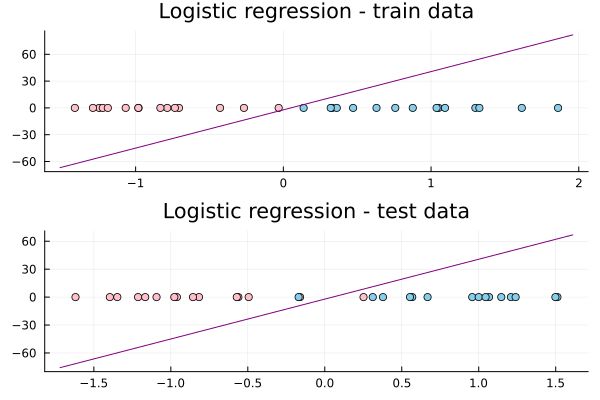

In [145]:
p1 = create_plot(x_trn, w, 2, "Logistic regression - train data")
p2 = create_plot(x_tst, w, 2, "Logistic regression - test data")
plot(p1, p2,layout=(2,1), legend=false)

Result - classified images

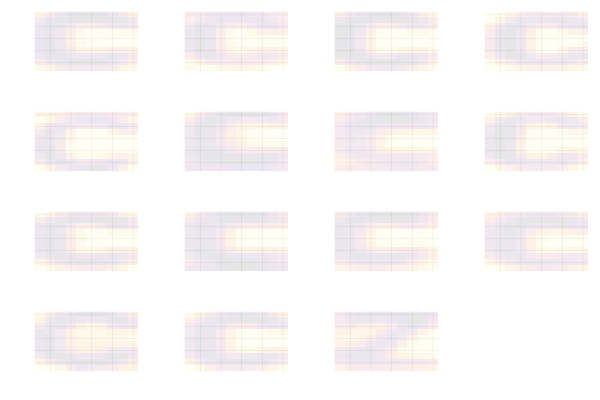

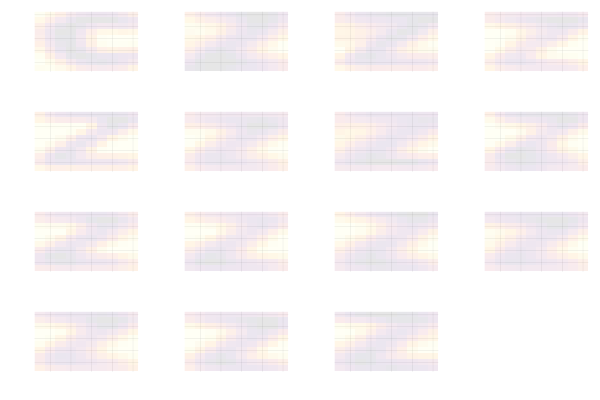

In [150]:
show_classification(imgs_tst, indices, res_lbl)

Classify using 2 features

In [151]:
w_init = [-7.0,2.0,-8.0]
res = logistic_loss(X_trn_2,lbls_trn,w_init)
w,wt,Et = logistic_loss_gradient_descent(X_trn_2,lbls_trn,w_init)
res_lbl = classification(X_tst_2, w, Logreg())
err = compute_error(res_lbl, lbls_tst)
println("Classification error on the test set: $(err)")

Classification error on the test set: 0.06666666666666667


Plot the progress of the gradient descent

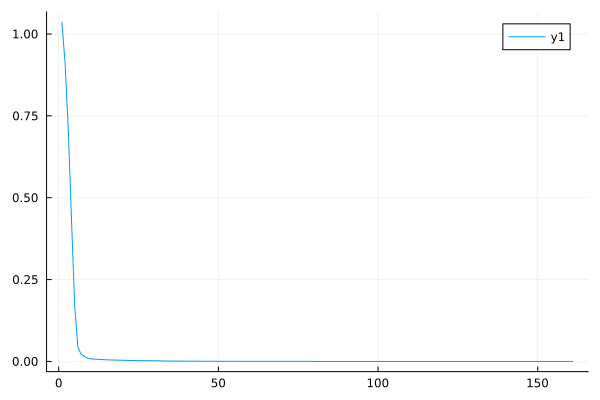

In [152]:
xs = 1:size(Et)[1]
plot(xs,Et)

Result - classified images

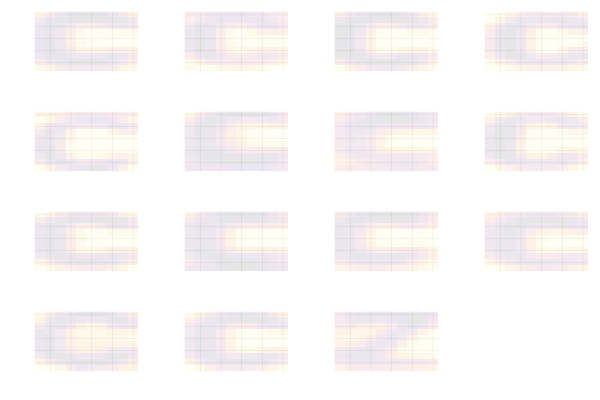

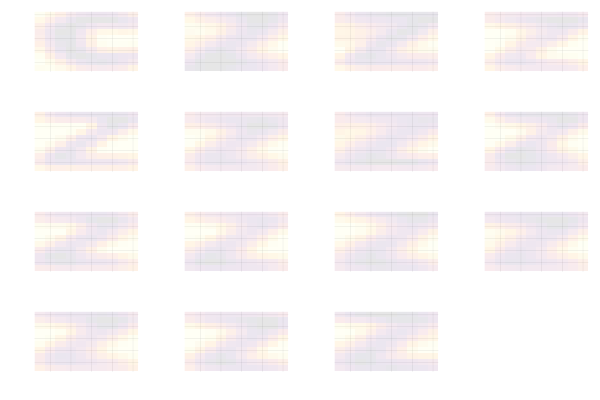

In [153]:
show_classification(imgs_tst, indices, res_lbl)

## Kozinec algorithm

Classify test data

In [154]:
alpha_k = kozinec(X_trn_1, lbls_trn)
res_koz = classification(X_tst_1, alpha_k, Kznc())
alpha_p = kozinec(X_trn_1, lbls_trn, alg=Perceptron())
res_per = classification(X_tst_1, alpha_k, Kznc())
err_k = compute_error(res_koz, lbls_tst)
err_p = compute_error(res_per, lbls_tst)
# println(alpha_k)
# println(alpha_p)
println("Kozinec algorithm classification error on test data: $(err_k)")
println("Perceptron algorithm classification error on test data: $(err_p)")

Kozinec algorithm classification error on test data: 0.06666666666666667
Perceptron algorithm classification error on test data: 0.06666666666666667


Show test data separation

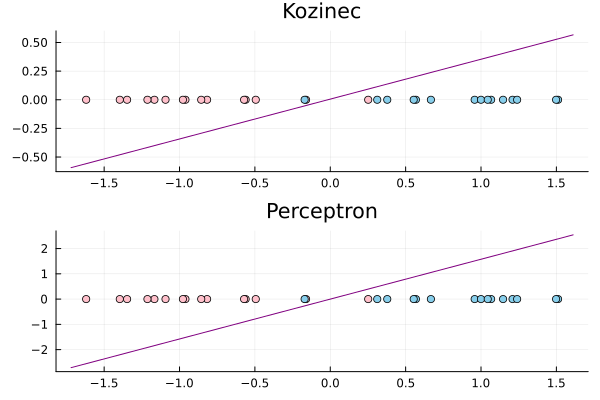

In [155]:
p1 = create_plot(x_tst, alpha_k,2, "Kozinec")
p2 = create_plot(x_tst, alpha_p,2, "Perceptron")
plot(p1, p2,layout=(2,1), legend=false)

Result - classified images

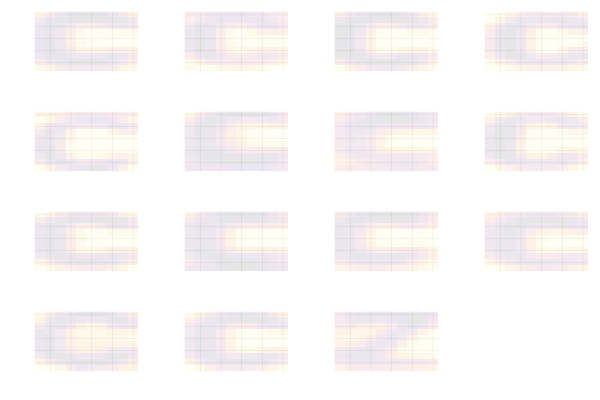

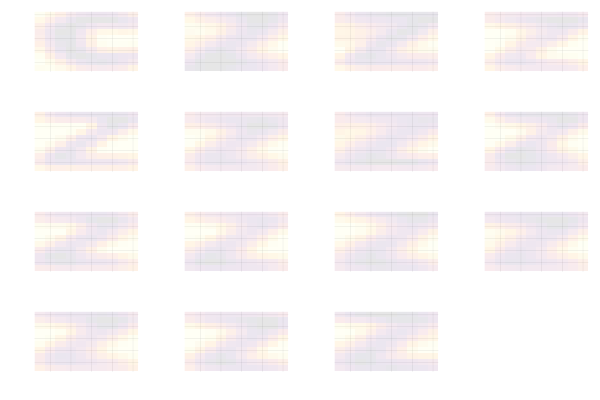

In [156]:
show_classification(imgs_tst, indices, res_koz)

Classify test data using 2 features

In [157]:
alpha_k = kozinec(X_trn_2, lbls_trn)
res_koz = classification(X_tst_2, alpha_k, Kznc())
alpha_p = kozinec(X_trn_2, lbls_trn, alg=Perceptron())
res_per = classification(X_tst_2, alpha_k, Kznc())
err_k = compute_error(res_koz, lbls_tst)
err_p = compute_error(res_per, lbls_tst)
# println(alpha_k)
# println(alpha_p)
println("Kozinec algorithm classification error on test data: $(err_k)")
println("Perceptron algorithm classification error on test data: $(err_p)")

Kozinec algorithm classification error on test data: 0.03333333333333333
Perceptron algorithm classification error on test data: 0.03333333333333333


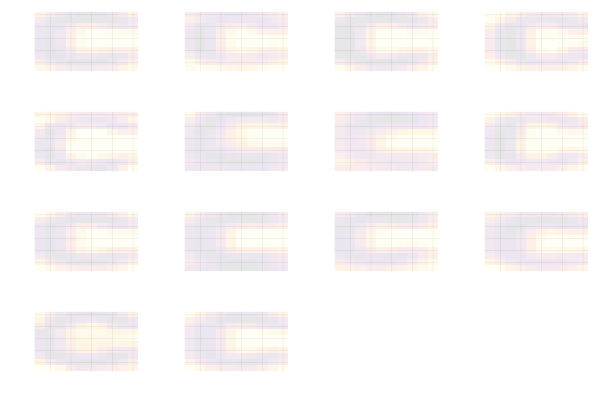

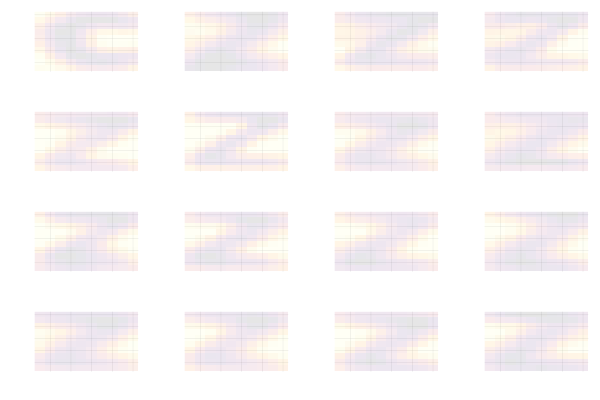

In [158]:
show_classification(imgs_tst, indices, res_koz)

## Inseparable data

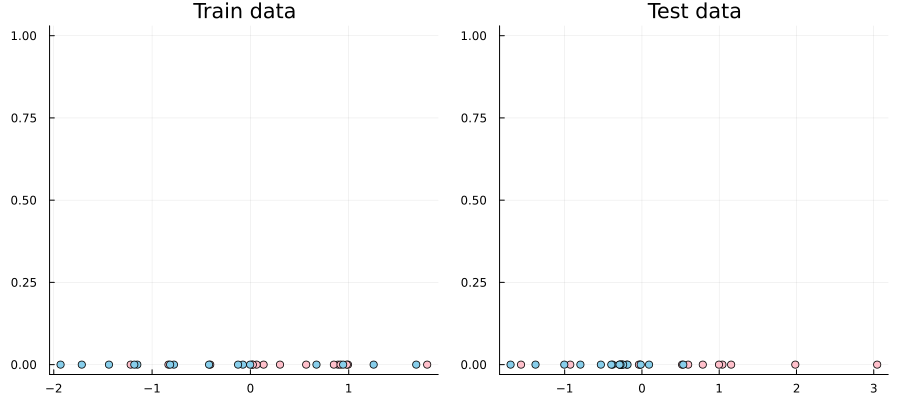

In [159]:
#AC, MN, KP, YT
# Best: DH, YT
imgs, lbls, letter_counts, indices = create_work_set(alphabet, images, labels, letters = "KP");
imgs_trn, lbls_trn, imgs_tst, lbls_tst = crossval(imgs, lbls, letter_counts);

# Prepare the data - compute features, add padding, etc.
x_trn, X_trn_1, X_trn_2, lbls_trn = prep_data(imgs_trn, lbls_trn)
x_tst, X_tst_1, X_tst_2, lbls_tst = prep_data(imgs_tst, lbls_tst)

# Show data inseparability
test_train_plot(x_trn, x_tst)

In [160]:
# Logreg
w_init = [-4.0,-1.0]
res = logistic_loss(X_trn_1,lbls_trn,w_init)
w,wt,Et = logistic_loss_gradient_descent(X_trn_1,lbls_trn,w_init)
res_lbl = classification(X_trn_1, w, Logreg())
err = compute_error(res_lbl, lbls_trn)
# println(lbls_trn)
# println(res_lbl)
println("Classification error on the train set: $(err)")

# TEST SET
res_lbl = classification(X_tst_1, w, Logreg())
err = compute_error(res_lbl, lbls_tst)
# println(lbls_trn)
# println(res_lbl)
println("Classification error on the test set: $(err)")

Classification error on the train set: 0.23333333333333334
Classification error on the test set: 0.3


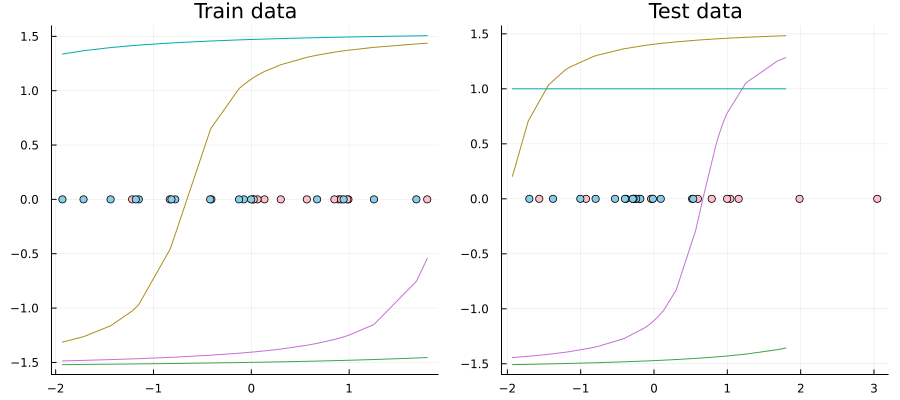

In [170]:
dims=7
m2 = Arctan()
a = collect(dimension_lifting(x_trn, dims=dims, lifter = m2))
a = reduce(vcat,transpose.(a))
b = collect(dimension_lifting(x_tst,dims=dims, lifter = m2))
b = reduce(vcat,transpose.(b))
p1 = test_train_plot(x_trn, x_tst)
indices = sortperm(x_trn)
x_n = x_trn[indices]
p1 = plot(p1,x_n,a[:,1:end])

In [171]:
w_init = ones(dims+1)
a = reshape(a,dims+1,30)
b = reshape(b,dims+1,30)
res = logistic_loss(a,lbls_trn,w_init)
w,wt,Et = logistic_loss_gradient_descent(a,lbls_trn,w_init)
res_lbl = classification(a, w, Logreg())
err = compute_error(res_lbl, lbls_trn)
println("Classification error on the train set: $(err)")
res_lbl = classification(b, w, Logreg())
err = compute_error(res_lbl, lbls_tst)
println("Classification error on the test set: $(err)")

Classification error on the train set: 0.06666666666666667
Classification error on the test set: 0.06666666666666667


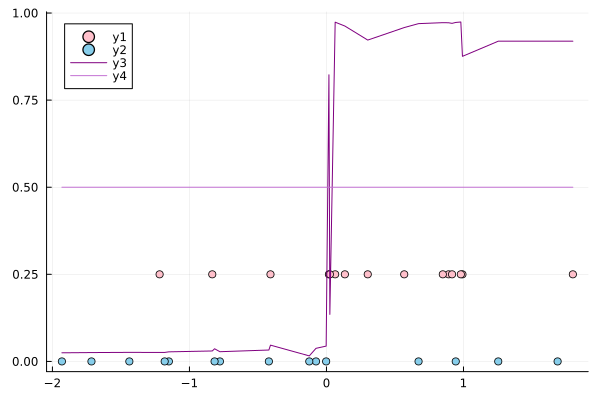

Classification error on the train set: 0.06666666666666667


In [172]:
res = a'*w
x1 = x_trn[1:size(x_trn)[1]÷2]
x2 = x_trn[size(x_trn)[1]÷2+1:end]
p3 = plot(x1,zeros(15).+0.25,seriestype=:scatter, color=:pink)
p3 = plot(p3, x2,zeros(15),seriestype=:scatter, color=:skyblue)
indices = sortperm(x_trn)
x_n = x_trn[indices]
post = posteriori(res)
post2 = posteriori(-res)
p3 = plot(p3,x_n,post, color=:purple)
# p3 = plot(p3,x_n,post2)
p3 = plot(p3,x_n,ones(size(post)[1]).*0.5)
lbls_post = [ifelse(el >= 0.5, -1, 1) for el in post]
# println(lbls_post)
# println(lbls_trn)
err = compute_error(lbls_post, lbls_trn)
println("Classification error on the train set: $(err)")
display(p3)

## Multivariate Perceptron

In [198]:
n = 3
X1 = [1 1.5 2; 1 0 1]
lbls1 = zeros(size(X1)[2])
X2 = [-3 -2 -2.25 -1; 0 -1 -0.85 0] 
lbls2 = zeros(size(X2)[2]).+1
X3 = [-2 -1.5 -2.75; 4 5.5 4.5]
lbls3 = zeros(size(X3)[2]).+2
X = hcat(X1,X2,X3)
lbls = vcat(lbls1,lbls2,lbls3)
#Calculate means
m1 = get_mean(X1)
m2 = get_mean(X2)
m3 = get_mean(X3)
w_init = hcat(m1,m2,m3)
w,b = multivar(X, lbls, w_init,3)

([2.5 -2.0625 -3.0833333333333335; 1.6666666666666665 -0.4625 3.666666666666667], [1.0, 0.0, -1.0])

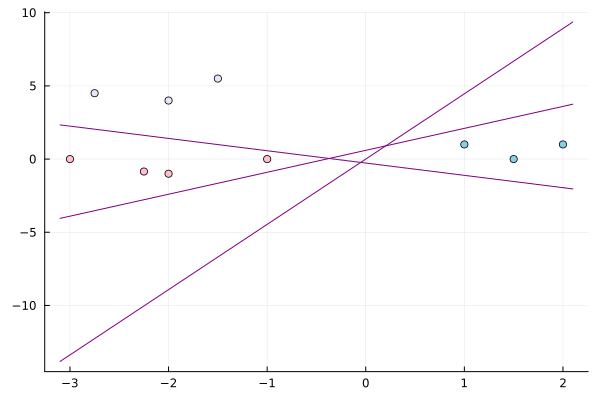

In [202]:
p = plot(X1[1,:], X1[2,:], seriestype=:scatter, color=:skyblue)
p = plot(p,X2[1,:], X2[2,:], seriestype=:scatter, color=:pink)
p = plot(p,X3[1,:], X3[2,:], seriestype=:scatter, color=:lavender)
separ3(x::Real, w::Vector, b::Real) = (w[1]*x+b)/w[2]
w1 = w[:,1]
w2 = w[:,2]
w3 = w[:,3]
xlims = extrema(X[1,:]) .+ [-0.1, 0.1]
p = plot(p,xlims, x -> separ3(x,w1,b[1]), line = (:purple,1), legend=false)
p = plot(p,xlims, x -> separ3(x,w2,b[2]), line = (:purple,1))
p = plot(p,xlims, x -> separ3(x,w3,b[3]), line = (:purple,1))

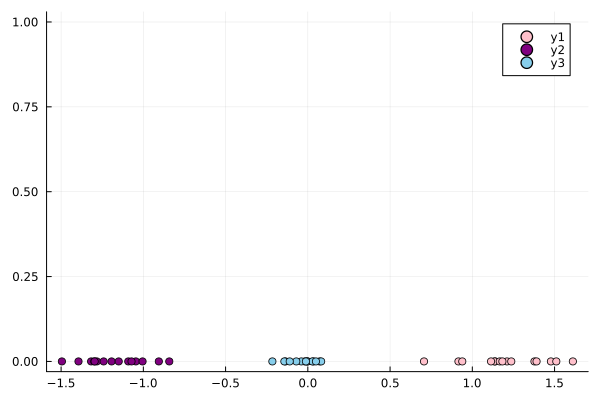

In [203]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V',
'Y', 'Z']

# Choose three letters
imgs, lbls, letter_counts, indices = create_work_set(alphabet, images, labels, letters = "JLB");
imgs_trn, lbls_trn, imgs_tst, lbls_tst = crossval(imgs, lbls, letter_counts);

# Prepare the data - compute features, add padding, etc.
x_trn, X_trn_1, X_trn_2, _= prep_data(imgs_trn, lbls_trn)
x_tst, X_tst_1, X_tst_2, _= prep_data(imgs_tst, lbls_tst)

n = size(x_trn)[1]÷3
x1 = x_trn[1:n]
x2 = x_trn[n+1:end-n]
x3 = x_trn[end-n+1:end]
p = plot(x1,zeros(n),seriestype=:scatter, color=:pink)
p = plot(p, x2,zeros(n),seriestype=:scatter, color=:purple)
p = plot(p, x3,zeros(n),seriestype=:scatter, color=:skyblue)


In [204]:
X = X_trn_2[1:2,:]
w_init, X1, X2, X3 = multi_w(X, letter_counts)
w,b = multivar(X, lbls_trn, w_init,3)

([1.2076085985203322 -1.1753038815753287 -0.03230471694500338; 0.6137856238361497 0.6094110028218943 -1.223196626658044], [0.0, 0.0, 0.0])

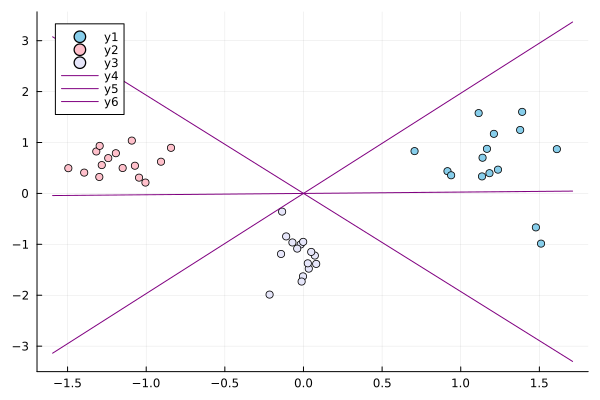

In [205]:
p = plot(X1[1,:], X1[2,:], seriestype=:scatter, color=:skyblue)
p = plot(p,X2[1,:], X2[2,:], seriestype=:scatter, color=:pink)
p = plot(p,X3[1,:], X3[2,:], seriestype=:scatter, color=:lavender)
w1 = w[:,1]
w2 = w[:,2]
w3 = w[:,3]
xlims = extrema(X[1,:]) .+ [-0.1, 0.1]
p = plot(p,xlims, x -> separ3(x,w1,b[1]), line = (:purple,1))
p = plot(p,xlims, x -> separ3(x,w2,b[2]), line = (:purple,1))
p = plot(p,xlims, x -> separ3(x,w3,b[3]), line = (:purple,1))